A project that predicts profitability of a Startup based on some KPI;
1. R&D Spend
3. Administration
4. Marketing 
5. Spend
6. State

In [0]:
# Data Preprocessing Template

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [0]:
dataset.isnull().sum() # checking for null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [0]:
dataset.shape # checking the shape

(50, 5)

In [0]:
dataset.info() # getting the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


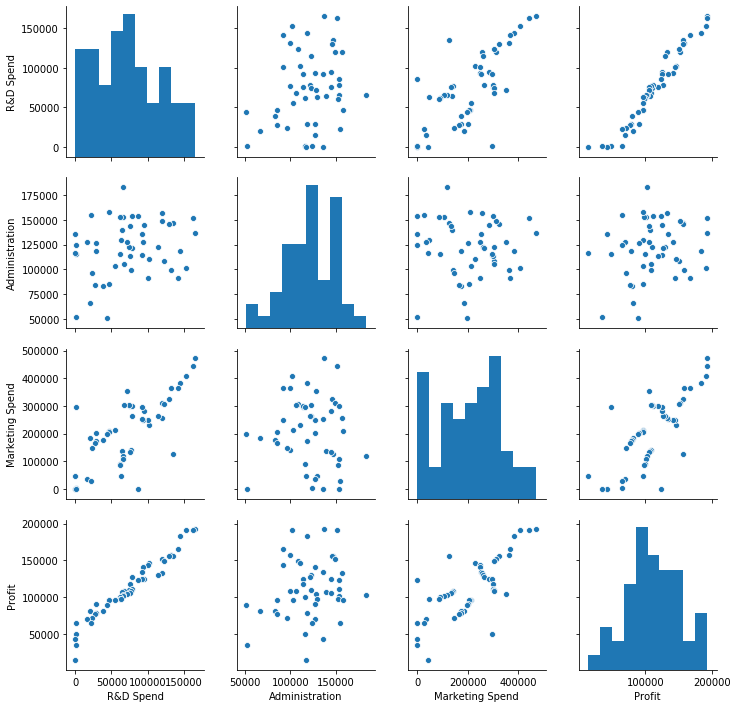

In [0]:
sns.pairplot(dataset) # visualization

In [0]:
dataset.State = pd.get_dummies(dataset["State"], drop_first=True) # encoding categorical varibale

In [0]:
dataset.head() # first 5 row

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [0]:
# fatures and target
X = dataset[["R&D Spend", "Administration", "Marketing Spend", "State"]]
y = dataset["Profit"]

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

# y = scaler.fit_transform(y)

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
# currently its available as part of mlxtend and not sklearn
from mlxtend.regressor import StackingRegressor
from sklearn import model_selection

In [0]:
# Initialize the models
RF = RandomForestRegressor(n_estimators = 100)
SVM = SVR()
KNR = KNeighborsRegressor()
DTR = DecisionTreeRegressor()
ABR = AdaBoostRegressor(n_estimators = 100)
BR = BaggingRegressor(n_estimators = 100)
GBR = GradientBoostingRegressor(n_estimators = 100)
xgboost = xgb.XGBRegressor()

In [0]:
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
# the score
RF.score(X_test, y_test)

0.9517652182724389

In [0]:
# using Xgboost
xgboost.fit(X_train, y_train)

[21:15:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
xgboost.score(X_test, y_test)

0.8884964949858131

In [0]:
# Using Adaboost
ABR.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=None)

In [0]:
ABR.score(X_test, y_test)

0.9448351491945098

In [0]:
# Uing GradientBoosting
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
GBR.score(X_test, y_test)

0.9188619424260701

# Calculating Errors

In [0]:
from sklearn.metrics import r2_score, mean_absolute_error

pred = RF.predict(X_test)

In [0]:
r2_score(y_test, pred) #error score

0.9517652182724389

In [0]:
mean_absolute_error(y_test, pred) # mean absolute error

5615.81984000003

In [0]:
# Saving our model
import pickle 

with open('profitability_model.pkl', 'wb') as model:
  pickle.dump(RF, model)

# Visualizing the Result


0.9610331886472918


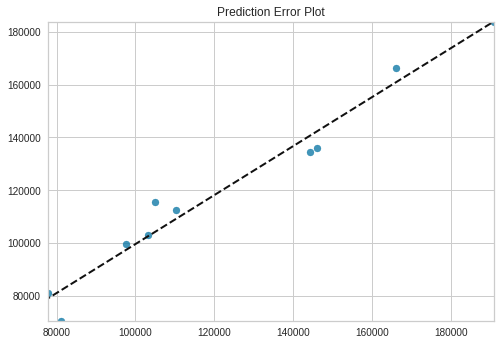

In [0]:
from yellowbrick.regressor import PredictionError


visualizer = PredictionError(RF)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
print(visualizer.score(X_test, y_test)) # Evaluate the model on the test data
plt.title("Prediction Error Plot")
plt.show() # Finalize and render the figur